**Beginner Task**

**Task 4**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


**Load the Dataset**

In [ ]:
# Load the Mall Customer Segmentation Dataset
data = pd.read_csv('Mall_Customers.csv')

# View dataset structure
print(data.head())
print(data.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


**Perform Exploratory Data Analysis (EDA)**

**Overview of Features**

In [ ]:
# Descriptive statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Visualizations**

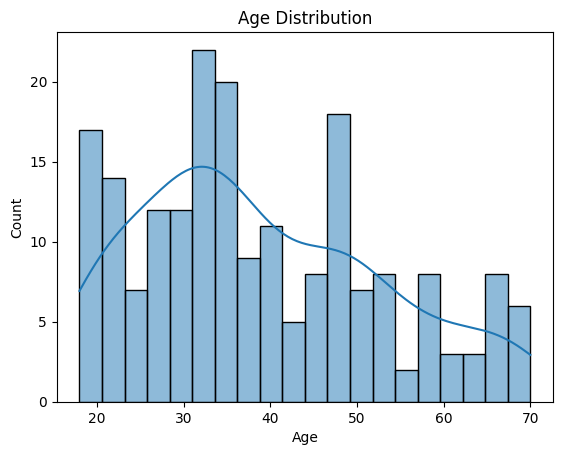

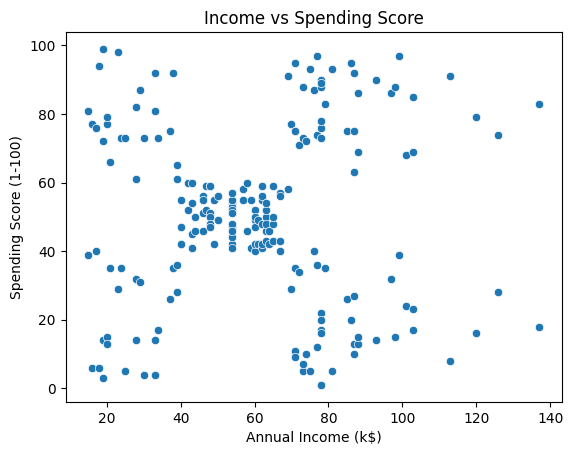

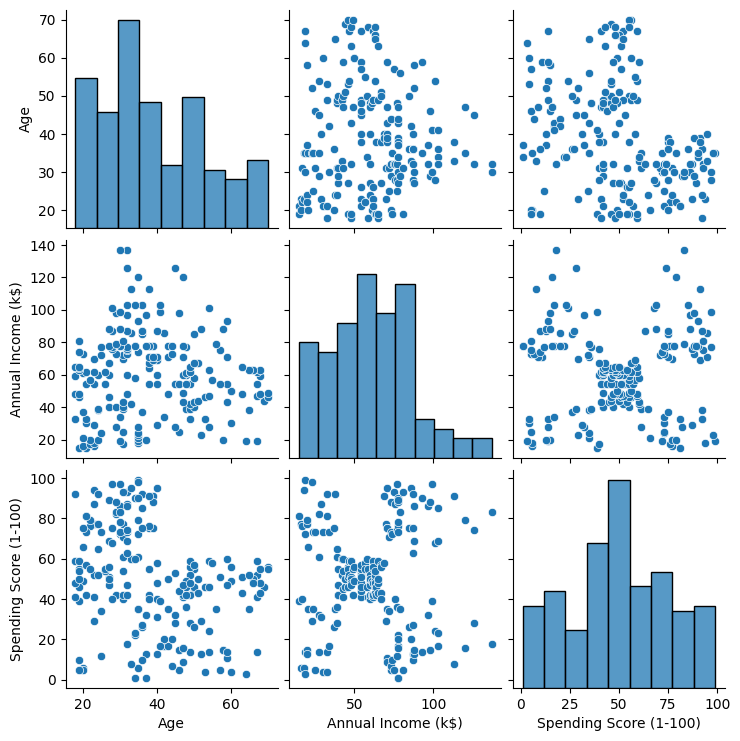

In [ ]:
# Histogram of Age
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Scatter plot of Income vs Spending Score
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'])
plt.title('Income vs Spending Score')
plt.show()

# Pairplot for feature relationships
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


**Data Preprocessing**


In [ ]:
# Scaling the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


**Apply Clustering Algorithms**

**K-Means Clustering**

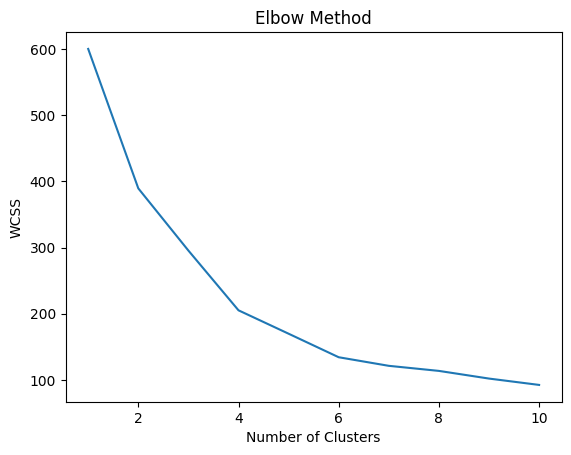

In [ ]:
# Elbow method to determine optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


**Fit K-Means with Optimal Clusters**

In [ ]:
# Fit K-Means with chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# View cluster assignments
print(data['Cluster'].value_counts())


Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64


**Visualize Clusters**

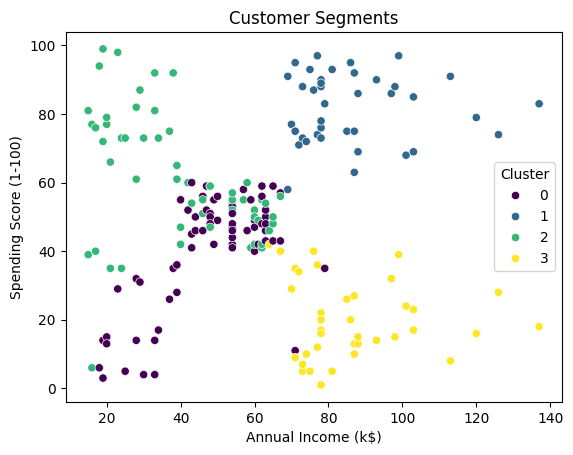

In [ ]:
# Visualize clusters (e.g., Income vs Spending Score)
sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='viridis'
)
plt.title('Customer Segments')
plt.show()


**Interpret Customer Segments**

//For categorical variables like gender, use counts or mode instead of mean.

In [ ]:
# Grouping numeric features by clusters
cluster_numeric_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_numeric_summary)

# Grouping categorical features by clusters (example: Gender)
cluster_categorical_summary = data.groupby('Cluster')['Gender'].agg(lambda x: x.mode()[0])
print(cluster_categorical_summary)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947
Cluster
0    Female
1    Female
2    Female
3    Female
Name: Gender, dtype: object


**Task 5**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


**Import Libraries and Load Dataset**



In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Preprocess the Text**

In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation and numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

**Load IMDB Dataset**

In [ ]:
# Sample load - Replace with the actual path to the IMDb dataset
df = pd.read_csv('IMDB Dataset.csv')
df['review'] = df['review'].apply(preprocess_text)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

**Split the Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)


**Vectorize Text Data (TF-IDF)**

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


**Train Machine Learning Models**

**1. Logistic Regression**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
lr_preds = lr_model.predict(X_test_vec)


**2. Naïve Bayes**

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_preds = nb_model.predict(X_test_vec)


**3. Support Vector Machine (SVM)**

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)
svm_preds = svm_model.predict(X_test_vec)


**Evaluate Models**

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"{name} F1-score: {f1_score(y_true, y_pred):.4f}\n")

evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Naïve Bayes", y_test, nb_preds)
evaluate_model("SVM", y_test, svm_preds)


Logistic Regression Accuracy: 0.8876
Logistic Regression F1-score: 0.8899

Naïve Bayes Accuracy: 0.8506
Naïve Bayes F1-score: 0.8521

SVM Accuracy: 0.8797
SVM F1-score: 0.8818



**Simple Command-Line Interface**

In [ ]:
def predict_review_sentiment(review, model, vectorizer):
    review = preprocess_text(review)
    review_vec = vectorizer.transform([review])
    prediction = model.predict(review_vec)[0]
    return "Positive" if prediction == 1 else "Negative"

# Example:
user_review = input("Enter a movie review: ")
print("Predicted Sentiment:", predict_review_sentiment(user_review, lr_model, vectorizer))


Enter a movie review: I absolutely loved the acting and storyline. It was a masterpiece!
Predicted Sentiment: Positive
